In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.sparse import coo_matrix, csr_matrix
%matplotlib inline
import os
import seaborn as sns

In [3]:
DatabaseDF = pd.read_csv("CleanedDataset.csv")

FileNotFoundError: [Errno 2] File b'CleanedDataset.csv' does not exist: b'CleanedDataset.csv'

In [61]:
DatabaseDF.head()

,Unnamed: 0,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs",...,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Completion Type,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
0,0,Operator 1,Well 1,MBH,5114.0,30.0,141,99,10,0.0,...,NaN,660.0,33.55,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
1,1,Operator 2,Well 2,MBH,5181.0,NaN,142,99,16,418000.0,...,NaN,660.0,27.62,NaN,NaN,NaN,NaN,NaN,NaN,2005.0
2,2,Operator 2,Well 3,MBH,4780.0,15.0,142,99,24,568407.0,...,NaN,660.0,11.19,OH,NaN,NaN,NaN,NaN,NaN,2006.0
3,3,Operator 1,Well 4,MBH,10654.0,1.0,142,99,1,845000.0,...,NaN,660.0,27.85,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
4,4,Operator 2,Well 5,MBH,5209.0,1.0,142,99,35,297366.0,...,NaN,660.0,50.88,OH,NaN,NaN,NaN,NaN,NaN,2006.0


# Testing Different Features (Complied ones that worked the Best)

In [63]:
X = DatabaseDF['Range']
Y = DatabaseDF['Longitude']

best fit line:
y = -90.75 + -0.13x


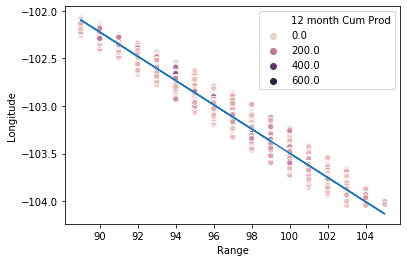

In [64]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)


# plot points and fit line
import matplotlib.pyplot as plt
sns.scatterplot(x = 'Range', y = 'Longitude', hue = '12 month Cum Prod',data = DatabaseDF)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
# Build PPC Model based on negative correlations on the tested correlation types
# Pearson Correlation strong negative correlation between the Longitude and Range

The PPC Curve's purpose is the negative correlation between two variables to show optimization of oil production if on the line best fit. If there is a strong negative correlation between the two variables, then the PPC model will apply. 

In [65]:
from scipy.stats import pearsonr
corr, _ = pearsonr(DatabaseDF['Range'], DatabaseDF['Longitude'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.984


In [66]:
from scipy.stats import spearmanr
corr, _ = spearmanr(DatabaseDF['Range'], DatabaseDF['Longitude'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.983


In [67]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(X, yfit)

198.8913919407014

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, yfit)

39573.17896112801

In [69]:
X = DatabaseDF['Longitude']
Y = DatabaseDF['Latitude']

best fit line:
y = 33.81 + -0.14x


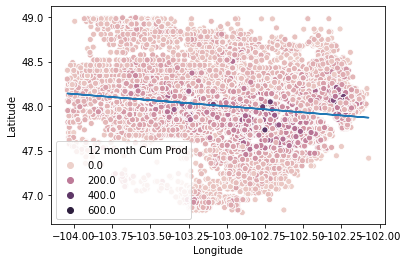

In [70]:

# solution
a, b = best_fit(X, Y)


# plot points and fit line
import matplotlib.pyplot as plt
sns.scatterplot(x = 'Longitude', y = 'Latitude', hue = '12 month Cum Prod',data = DatabaseDF)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
# see the best line fit near the most cum production

We can see that the dots near the best fit have optimal oil production. This is taking two negative correlated features, Longitude and Latitude. 

In [71]:
corr, _ = pearsonr(DatabaseDF['Longitude'], DatabaseDF['Latitude'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(DatabaseDF['Longitude'], DatabaseDF['Latitude'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: -0.148
Spearmans correlation: -0.127


In [72]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, yfit) # Using different errors to understand where our model stands

22792.783399571847

In [73]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(X, yfit)

150.97191791572698

best fit line:
y = -102.99 + 0.00x


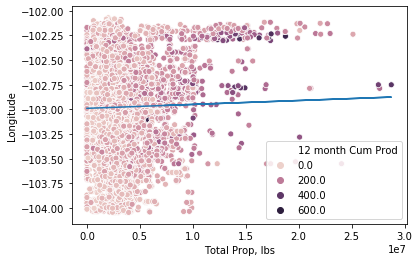

In [74]:
X = DatabaseDF['Total Prop, lbs']
Y = DatabaseDF['Longitude']

# solution
a, b = best_fit(X, Y)

# plot points and fit line

sns.scatterplot(x = 'Total Prop, lbs', y = 'Longitude', hue = '12 month Cum Prod',data = DatabaseDF)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
# see the best line fit near the most cum production

In [75]:
corr, _ = pearsonr(DatabaseDF['Total Prop, lbs'], DatabaseDF['Longitude'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(DatabaseDF['Total Prop, lbs'], DatabaseDF['Longitude'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.021
Spearmans correlation: -0.136


In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, yfit)

16693346252356.121

In [77]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(X, yfit)

3332172.1375561315

This may not be the best model; however it does show the optimal production of oil for two features the best on the first two graphs. Has some potential to work with a few features